In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

num_points = 400
dimensions = 2
points = np.random.uniform(0, 1000, [num_points, dimensions])

def input_fn():
    return tf.compat.v1.train.limit_epochs(
        tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)

num_clusters = 7
kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

# train
num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
    kmeans.train(input_fn)
    cluster_centers = kmeans.cluster_centers()
    if previous_centers is not None:
        previous_centers = cluster_centers

# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(points):
    cluster_index = cluster_indices[i]
    center = cluster_centers[cluster_index]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp0d6o21le', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Varia

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 11...
INFO:tensorflow:Saving checkpoints for 11 into /tmp/tmp0d6o21le/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 11...
INFO:tensorflow:loss = 9518982.0, step = 12
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 13...
INFO:tensorflow:Saving checkpoints for 13 into /tmp/tmp0d6o21le/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 13...
INFO:tensorflow:Loss for final step: 9518982.0.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0d6o21le/model.ckpt-13
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving ch

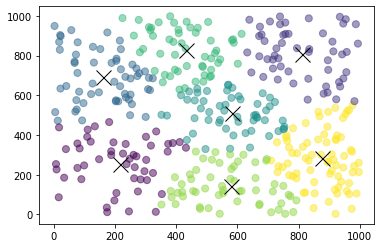

In [2]:
plt.scatter(points[:, 0], points[:, 1], c=cluster_indices, s=50, alpha=0.5)
plt.plot(cluster_centers[:, 0], cluster_centers[:, 1], 'kx', markersize=15)

plt.show()